In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

offers_connection = sqlite3.connect('../datasets/offers_dataset.db')
skills_connection = sqlite3.connect('../datasets/skills_dataset.db')

In [2]:
offers_frame = pd.read_sql_query('''SELECT * FROM offers''', offers_connection)
offers_frame.set_index('ID', inplace=True)
offers_connection.close()

skills_frame = pd.read_sql_query('''SELECT * FROM skills''', skills_connection)
skills_frame.set_index('ID', inplace=True)
skills_connection.close()


In [3]:
offers_frame.head(10)

,Name,Description,Language,LocationType,Location
ID,,,,,
1,Software Developer - AI Trainer (Contract),We are looking for proficientprogrammersto joi...,Italian,Remote,None
2,"Software Developer Java, C++ o C# a Padova","Brain Tree Srl, azienda di consulenza informat...",Italian,On-Site,"Padova, Veneto"
3,Ingegnere Software Applicativo,Avio è un'azienda leader nella propulsione spa...,Italian,On-Site,00034 Lazio
4,Deloitte NextHub Bari – Software Developer - J...,Deloitte NextHub Bari – Software Developer - J...,Italian,On-Site,"Bari, Puglia"
5,Remote Senior Wordpress Developer - Fluent in ...,The Role:We are looking for aSeniorWordPress d...,Italian,Remote,None
6,Remote Senior PowerBi Developer - Fluent in En...,The Role:We are looking for aSeniorMicrosoft P...,Italian,Remote,None
7,Sviluppatore Mobile iOS,Cosmobile Srl è una software house con sedi a ...,Italian,On-Site,"Forlì, Emilia-Romagna"
8,DEVOPS Engineer,Si richiede la capacità di sviluppo siti e sol...,Italian,On-Site,20144 Milano
9,Remote Senior Magento II Developer - Fluent in...,The Role:We are looking for aSeniorMagento II ...,Italian,Remote,None


In [4]:
skills_frame.head(10)

,Skill
ID,
1,moonscript
2,literate coffeescript
3,Elasticsearch
6,dart
10,MATLAB
16,Swift
17,html
18,SAP Crystal Reports
20,sql


## Data Exploration
Come prima cosa esaminiamo il nostro dataset di offerte.

### LocationType Distribution

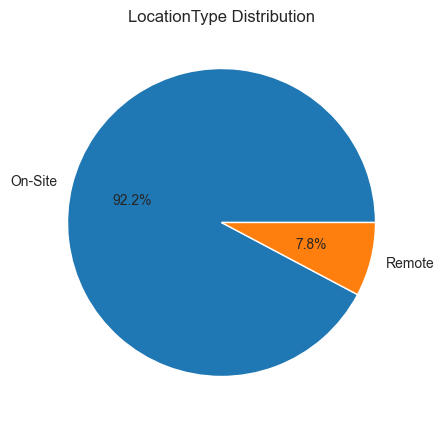

In [5]:
location_type_counts = offers_frame.value_counts('LocationType')
location_type_counts = location_type_counts.to_dict()

sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
plt.pie(location_type_counts.values(), labels=location_type_counts.keys(), autopct='%1.1f%%')
plt.title('LocationType Distribution')
plt.show()

### Location Distribution
Provando a effettuare il conteggio delle Location notiamo che:
- Righe None -> NaN
- Le strighe devono essere omologate

In [6]:
location_count = offers_frame.value_counts('Location')

query_milano = location_count.index.str.contains('Milano', case=False, na=False)
print(f'Milano: {location_count[query_milano]}')

query_london = location_count.index.str.contains('London', case=False, na=False)
print(f'Milano: {location_count[query_london]}')


Milano: Location
Milano, Lombardia    34
20100 Milano          2
20149 Milano          2
20121 Milano          1
20124 Milano          1
20142 Milano          1
20144 Milano          1
20145 Milano          1
Name: count, dtype: int64
Milano: Location
London            86
London E14         4
London EC4N        2
London W4          2
London TW11        1
West London        1
London SE1         1
London SW7         1
London NW9         1
London EC3N        1
Greater London     1
Name: count, dtype: int64


In [7]:
# -- Sostituzione None con NaN
offers_frame.loc[offers_frame.LocationType == 'Remote', 'Location'] = np.nan

# -- Trasformazione stringhe
location_list = offers_frame.loc[offers_frame.LocationType != 'Remote', 'Location'].unique().tolist()
location_list

['Padova, Veneto',
 '00034 Lazio',
 'Bari, Puglia',
 'Forlì, Emilia-Romagna',
 '20144 Milano',
 '84131 Salerno',
 'Pisa, Toscana',
 'Termoli, Molise',
 'Bologna, Emilia-Romagna',
 '00165 Roma',
 'Bolzano - Bozen, Trentino-Alto Adige',
 '70100 Bari',
 'Macerata, Marche',
 'Roma, Lazio',
 '48018 Faenza',
 'Taranto, Puglia',
 'Milano, Lombardia',
 '10152 Torino',
 'Basovizza, Friuli-Venezia Giulia',
 'Verona, Veneto',
 'Scandicci, Toscana',
 '20149 Milano',
 'Torino, Piemonte',
 'Pescara, Abruzzo',
 '66041 Atessa',
 '47122 Forlì',
 'Provincia di Torino, Piemonte',
 'Borgo Panigale, Emilia-Romagna',
 'Carugate, Lombardia',
 '81030 Falciano del Massico',
 '38123 Trento',
 'Italia',
 '00173 Roma',
 'Agrate Brianza, Lombardia',
 'Modena, Emilia-Romagna',
 '41123 Modena',
 '34170 Gorizia',
 'Provincia di Roma, Lazio',
 '84091 Battipaglia',
 'Nola, Campania',
 '07100 Sassari',
 '20100 Milano',
 'Lecce, Puglia',
 '16100 Genova',
 '10121 Torino',
 'Belluno, Veneto',
 'Vicenza, Veneto',
 'Provinci

In [8]:
from location_cleaning import extract_locations
# TODO: debug address component extraction
locations_dict = extract_locations(location_list)

offers_frame['Location'] = offers_frame['Location'].replace(locations_dict)
offers_frame

,Name,Description,Language,LocationType,Location
ID,,,,,
1,Software Developer - AI Trainer (Contract),We are looking for proficientprogrammersto joi...,Italian,Remote,NaN
2,"Software Developer Java, C++ o C# a Padova","Brain Tree Srl, azienda di consulenza informat...",Italian,On-Site,"Province of Padua, Veneto, Italy"
3,Ingegnere Software Applicativo,Avio è un'azienda leader nella propulsione spa...,Italian,On-Site,"10, Valle Sette Due, Colleferro, Colleferro, C..."
4,Deloitte NextHub Bari – Software Developer - J...,Deloitte NextHub Bari – Software Developer - J...,Italian,On-Site,"Bari, Apulia, Italy"
5,Remote Senior Wordpress Developer - Fluent in ...,The Role:We are looking for aSeniorWordPress d...,Italian,Remote,NaN
...,...,...,...,...,...
692,Eltek Systems - Senior Control Systems Softwar...,Eltek Systems are looking to recruit Senior So...,Italian,On-Site,"Peterborough, Ontario, Canada"
693,Senior UI Programmer - AAA Project - Remote,Senior UI Programmer - AAA Project - RemoteFul...,Italian,On-Site,"Newcastle upon Tyne Central, Tyne and Wear, En..."
694,Software Engineer (C++) – HP Wolf Security,The primary focus of the HP Wolf Security team...,Italian,On-Site,"Cambridge, England, United Kingdom"


## Data Preparation

### Pulizia Skills
Come prima cosa:
- Verifichiamo che non ci siano skill ripetute

### Required Skills Extraction
Il sistema richiederà agli utenti di inserire le skill manualmente, ma il dataset delle offerte non ne è fornito, quindi qui di seguito verrà implementato il codice per estrarre le skill dalla descrizione; inoltre lo stesso codice può essere utilizzato per suggerire ai datori di lavoro delle skill da inserire durante la creazione di una offerta.

In [9]:
offers_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 1 to 696
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          696 non-null    object
 1   Description   696 non-null    object
 2   Language      696 non-null    object
 3   LocationType  696 non-null    object
 4   Location      642 non-null    object
dtypes: object(5)
memory usage: 32.6+ KB
